## Importing the libraries

In [755]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Importing the dataset

In [756]:
df = pd.read_csv('https://query.data.world/s/mt4znaqer467kxkyybsd2keyoq535m')
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3.0,0.0,"Zimmerman, Mr. Leo",male,29.0000,0.0,0.0,315082,7.8750,NaN,S,NaN,NaN,NaN


In [757]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   float64
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(7), object(7)
memory usage: 143.4+ KB


<AxesSubplot:xlabel='survived', ylabel='count'>

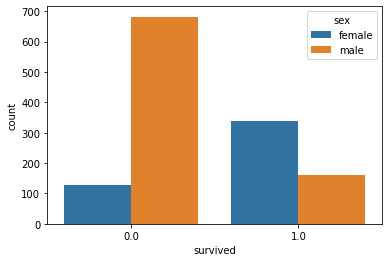

In [758]:
sns.countplot(x = 'survived' ,hue = 'sex', data = df)

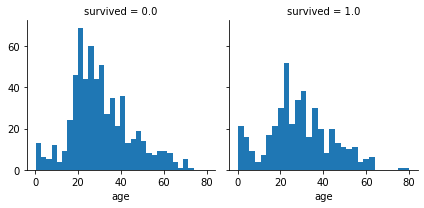

In [759]:
grid = sns.FacetGrid(df, col = "survived")
grid.map(plt.hist, "age", bins = 30)

In [760]:
by_Pclass = df.groupby("pclass")
by_Pclass["survived"].mean()

pclass
1.0    0.619195
2.0    0.429603
3.0    0.255289
Name: survived, dtype: float64

In [761]:
by_Parch = df.groupby("parch")
by_Parch["survived"].mean()

parch
0.0    0.335329
1.0    0.588235
2.0    0.504425
3.0    0.625000
4.0    0.166667
5.0    0.166667
6.0    0.000000
9.0    0.000000
Name: survived, dtype: float64

In [762]:
by_SibSp = df.groupby("sibsp")
by_SibSp["survived"].mean()

sibsp
0.0    0.346801
1.0    0.510972
2.0    0.452381
3.0    0.300000
4.0    0.136364
5.0    0.000000
8.0    0.000000
Name: survived, dtype: float64

In [763]:
by_Embarked = df.groupby("embarked")
by_Embarked["survived"].mean()

embarked
C    0.555556
Q    0.357724
S    0.332604
Name: survived, dtype: float64

### Pclass columns Preprocessing

In [764]:
#checking number of categories
df['pclass'].nunique()

3

In [765]:
df['pclass'].unique()

array([ 1.,  2.,  3., nan])

In [766]:
df.dropna(subset=['pclass'] , inplace = True)

In [767]:
#minimizing column size of pclass
df['pclass'] = df['pclass'].astype('int8')
df.head(3)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


### Survived column preprocessing

In [768]:
df['survived'].nunique()

2

In [769]:
df['survived'].unique()

array([1., 0.])

In [770]:
#minimizing column size of pclass
df['survived'] = df['survived'].astype('int8')
df.head(3)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


### name column preprocessing 

In [771]:
df['name'].sample(n=10)

1080                                 O'Keefe, Mr. Patrick
1131                   Pickard, Mr. Berk (Berk Trembisky)
708                             Carlsson, Mr. Carl Robert
427                             Hamalainen, Master. Viljo
101                          Dulles, Mr. William Crothers
772                                       Dika, Mr. Mirko
275     Spedden, Mrs. Frederic Oakley (Margaretta Corn...
21       Beckwith, Mrs. Richard Leonard (Sallie Monypeny)
384                        Cunningham, Mr. Alfred Fleming
437                                   Herman, Miss. Alice
Name: name, dtype: object

In [772]:
#make sure titles exist in each name
df['name'].apply(lambda x: '.' in x).all()

True

In [773]:
#extrcting titles from named

series = df['name'].apply(lambda x:x.split(', ')[1].split('. ')[0])
series.unique()


array(['Miss', 'Master', 'Mr', 'Mrs', 'Col', 'Mme', 'Dr', 'Major', 'Capt',
       'Lady', 'Sir', 'Mlle', 'Dona', 'Jonkheer', 'the Countess', 'Don',
       'Rev', 'Ms'], dtype=object)

In [774]:
df.insert(2, 'title' , series)
df.head(3)

,pclass,survived,title,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,Miss,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,Master,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,Miss,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [775]:
#drop name column as it doesn't matter with the target
df.drop('name' , axis=1 , inplace=True)
df.head(3)

,pclass,survived,title,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,Miss,female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,Master,male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,Miss,female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


### gender column preprocessing

In [776]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

### age column preprocessing

In [777]:
#checking column data type
df['age'].dtype

dtype('float64')

In [778]:
df['age'].isna().mean()

0.20091673032849502

In [779]:
#drop age column 
df.dropna(subset=['age'] , inplace=True)
df.head(3)

,pclass,survived,title,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,Miss,female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,Master,male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,Miss,female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


### sibsp & parch column preprocessing

In [780]:
df['sibsp'].unique()

array([0., 1., 2., 3., 4., 5., 8.])

In [781]:
df['parch'].unique()

array([0., 2., 1., 4., 3., 5., 6.])

In [782]:
#convert to int to minimize memory
df.loc[: , ['sibsp' , 'parch']] = df.loc[: , ['sibsp' , 'parch']].astype('int8')

In [783]:
df['sibsp'].unique()

array([0, 1, 2, 3, 4, 5, 8], dtype=int8)

In [784]:
df['parch'].unique()

array([0, 2, 1, 4, 3, 5, 6], dtype=int8)

### ticket column preprocessing

In [785]:
df['ticket'].unique()

array(['24160', '113781', '19952', '13502', '112050', '11769', 'PC 17609',
       'PC 17757', 'PC 17477', '19877', '27042', 'PC 17558', '11813',
       '13050', '11751', '111369', 'PC 17483', '13905', '11967',
       'PC 17760', '110564', '113784', '112277', '36928', '113783',
       '110489', 'PC 17608', '113505', '113054', 'PC 17591', 'PC 17610',
       '16966', '113050', 'PC 17476', 'PC 17606', 'PC 17755', '695',
       '113059', '113760', '19924', 'W.E.P. 5734', '113806', '110152',
       'PC 17594', '13508', '5727', 'PC 17756', '11770', 'WE/P 5735',
       '112901', 'PC 17599', '113055', '113804', 'F.C. 12750', '17474',
       '33638', 'PC 17761', '11755', 'PC 17485', 'PC 17580', '11767',
       '36947', 'PC 17531', 'PC 17474', '113051', '19950', 'PC 17611',
       '17765', '13568', '13567', '113803', '111320', '113503', '112378',
       'PC 17593', '17453', 'PC 17754', '113780', '112053', 'PC 17582',
       'PC 17759', '11765', 'PC 17572', '36973', '112059', '12749',
       '1130

In [786]:
# let make a translation table to remove numerical values from the ticket 
table = str.maketrans('','','0123456789./')



In [787]:
#test 
s = 'SOTON/OQ 3101317'
s.translate(table)

'SOTONOQ '

In [788]:
# extract whether the ticket are alphanumeric or numeric only
def func(x):
    return int(bool(x.translate(table)))
#df['ticket']=df['ticket'].apply(func)
df

,pclass,survived,title,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,Miss,female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,Master,male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,Miss,female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,Mr,male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,Mrs,female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1301,3,0,Mr,male,45.5000,0,0,2628,7.2250,NaN,C,NaN,312.0,NaN
1304,3,0,Miss,female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1306,3,0,Mr,male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,Mr,male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [789]:
filt = df['ticket'] == 0
df.loc[filt, 'survived'].mean()


nan

In [790]:
filt = df['ticket'] == 1

df.loc[filt, 'survived'].mean()

nan

In [791]:
# there is no difference between two cases so we can drop the ticket column
df.drop('ticket' , axis=1 , inplace = True)

In [792]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1046 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1046 non-null   int8   
 1   survived   1046 non-null   int8   
 2   title      1046 non-null   object 
 3   sex        1046 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1046 non-null   int8   
 6   parch      1046 non-null   int8   
 7   fare       1045 non-null   float64
 8   cabin      272 non-null    object 
 9   embarked   1044 non-null   object 
 10  boat       417 non-null    object 
 11  body       120 non-null    float64
 12  home.dest  685 non-null    object 
dtypes: float64(3), int8(4), object(6)
memory usage: 85.8+ KB


### Fare column preprocessing

In [793]:
df[df['fare'].isna()]

,pclass,survived,title,sex,age,sibsp,parch,fare,cabin,embarked,boat,body,home.dest
1225,3,0,Mr,male,60.5,0,0,NaN,NaN,S,NaN,261.0,NaN


In [794]:
temp_df = df[['pclass' , 'sibsp' , 'parch']] == [3 , 0 ,0]
temp_df

,pclass,sibsp,parch
0,False,True,True
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
1301,True,True,True
1304,True,False,True
1306,True,True,True
1307,True,True,True


In [795]:
filt = temp_df.all(axis = 1)

In [796]:
temp_df = df[filt]
temp_df

,pclass,survived,title,sex,age,sibsp,parch,fare,cabin,embarked,boat,body,home.dest
600,3,0,Mr,male,42.0,0,0,7.5500,NaN,S,NaN,NaN,NaN
604,3,1,Miss,female,16.0,0,0,7.6500,NaN,S,16,NaN,"Norway Los Angeles, CA"
605,3,1,Mr,male,25.0,0,0,7.6500,F G63,S,A,NaN,"Perkins County, SD"
606,3,1,Mr,male,20.0,0,0,7.9250,NaN,S,15,NaN,"Taalintehdas, Finland Hoboken, NJ"
607,3,1,Mrs,female,18.0,0,0,7.2292,NaN,C,C,NaN,"Greensburg, PA"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,3,0,Mr,male,36.0,0,0,9.5000,NaN,S,NaN,NaN,NaN
1301,3,0,Mr,male,45.5,0,0,7.2250,NaN,C,NaN,312.0,NaN
1306,3,0,Mr,male,26.5,0,0,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,Mr,male,27.0,0,0,7.2250,NaN,C,NaN,NaN,NaN


In [797]:
mean = temp_df['fare'].mean()


In [798]:
fill = temp_df['fare'].median()
fill

7.8792

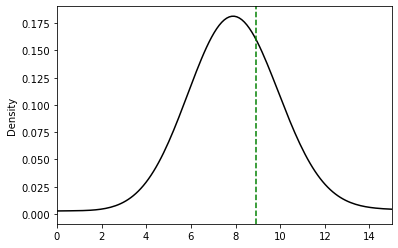

In [799]:
ax = temp_df['fare'].plot(kind = 'kde', color ='k')
ax.set_xlim(0,15)
ax.axvline(x=mean , linestyle ='--' ,color='g')

In [800]:
df["fare"] = df["fare"].fillna(fill)

### Cabina column preprocessing

In [801]:
df['cabin'].nunique()

174

In [802]:
df['cabin'].isna().mean()

0.739961759082218

In [803]:
df= df.drop('cabin' , axis=1)

In [804]:
df.head(3)

,pclass,survived,title,sex,age,sibsp,parch,fare,embarked,boat,body,home.dest
0,1,1,Miss,female,29.0000,0,0,211.3375,S,2,NaN,"St Louis, MO"
1,1,1,Master,male,0.9167,1,2,151.5500,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,Miss,female,2.0000,1,2,151.5500,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


### embarked column preprocessing

In [805]:
df['embarked'].nunique()

3

In [806]:
df['embarked'].unique()

array(['S', 'C', nan, 'Q'], dtype=object)

In [807]:
mode = df['embarked'].mode()[0]
mode

'S'

In [808]:
#we can fill embarked with mode as it categorical data we can't use mean or median
df['embarked'] = df['embarked'].fillna(mode)
df.head()

,pclass,survived,title,sex,age,sibsp,parch,fare,embarked,boat,body,home.dest
0,1,1,Miss,female,29.0000,0,0,211.3375,S,2,NaN,"St Louis, MO"
1,1,1,Master,male,0.9167,1,2,151.5500,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,Miss,female,2.0000,1,2,151.5500,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,Mr,male,30.0000,1,2,151.5500,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,Mrs,female,25.0000,1,2,151.5500,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [809]:
df['embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

<AxesSubplot:xlabel='embarked'>

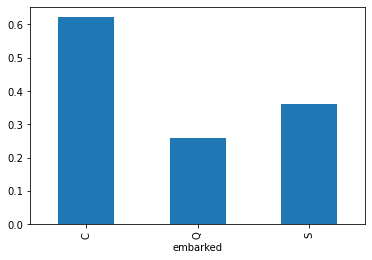

In [810]:
# testing whether ports of embarkation have an effect on survival 
df.groupby('embarked')['survived'].mean().plot(kind = 'bar')

In [811]:
df['embarked']=  df['embarked'].replace({'C':1 , 'Q':3 , 'S':2})

In [812]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1046 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1046 non-null   int8   
 1   survived   1046 non-null   int8   
 2   title      1046 non-null   object 
 3   sex        1046 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1046 non-null   int8   
 6   parch      1046 non-null   int8   
 7   fare       1046 non-null   float64
 8   embarked   1046 non-null   int64  
 9   boat       417 non-null    object 
 10  body       120 non-null    float64
 11  home.dest  685 non-null    object 
dtypes: float64(3), int64(1), int8(4), object(4)
memory usage: 77.6+ KB


In [813]:
df.drop(['boat' , 'body' , 'home.dest'] , axis = 1 , inplace = True)

In [814]:
df = pd.get_dummies(data = df, columns=['title'])
df = pd.get_dummies(data = df, columns=['sex'])
df

,pclass,survived,age,sibsp,parch,fare,embarked,title_Capt,title_Col,title_Don,...,title_Mlle,title_Mme,title_Mr,title_Mrs,title_Ms,title_Rev,title_Sir,title_the Countess,sex_female,sex_male
0,1,1,29.0000,0,0,211.3375,2,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,1,0.9167,1,2,151.5500,2,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,0,2.0000,1,2,151.5500,2,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,0,30.0000,1,2,151.5500,2,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,1,0,25.0000,1,2,151.5500,2,0,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1301,3,0,45.5000,0,0,7.2250,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1304,3,0,14.5000,1,0,14.4542,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1306,3,0,26.5000,0,0,7.2250,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1307,3,0,27.0000,0,0,7.2250,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [815]:
X = df.drop(["survived"], axis = 1).values
y = df["survived"].values

### Splitting the dataset into the Training set and Test set

In [816]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

### Feature Scaling

In [817]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, 1] = sc.fit_transform(X_train[: , 1].reshape(-1,1)).reshape(784)
X_test[: , 1] = sc.transform(X_test[: , 1].reshape(-1,1)).reshape(262)
X_train[:, 4] = sc.fit_transform(X_train[: , 4].reshape(-1,1)).reshape(784)
X_test[: , 4] = sc.transform(X_test[: , 4].reshape(-1,1)).reshape(262)

# KNN Classification


### Training the KNN Classification model on the Training set

In [818]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

### Predicting the Test set results

In [819]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [0 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [1 0]
 [0 0]
 [0 0]

### Making the Confusion Matrix

In [820]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

[[134  23]
 [ 27  78]]
0.8091603053435115
0.7722772277227723
0.7428571428571429
0.7572815533980582


### Making the ROC curve

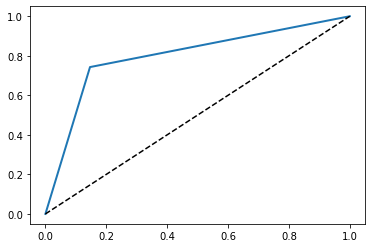

In [821]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, linewidth = 2)
plt.plot([0,1],[0,1], "k--")
plt.show()

# Random Forest Classification

### Training the Random Forest Classification model on the Training set

In [822]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

### Predicting the Test set results

In [823]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 1]
 [1 0]
 [1 1]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [0 1]
 [0 0]
 [0 1]
 [1 0]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]

### Making the Confusion Matrix

In [824]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

[[120  37]
 [ 32  73]]
0.7366412213740458
0.6636363636363637
0.6952380952380952
0.6790697674418604


# SVM Classification

### Training the Random Forest Classification model on the Training set

In [825]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

### Predicting the Test set results

In [826]:
y_pred = classifier.predict(X_test)

### Making the Confusion Matrix

In [827]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

[[114  43]
 [ 23  82]]
0.7480916030534351
0.656
0.780952380952381
0.7130434782608696


## KNN is the best model for this dataset with an accuracy of 81%